<Axes: xlabel='ПВ в %'>

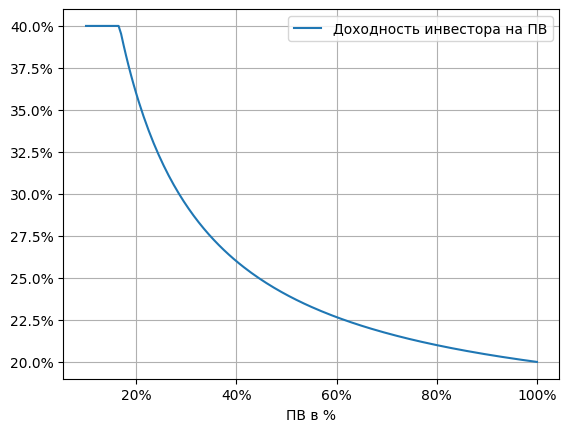

In [33]:
import pandas as pd

# import matplotlib
import matplotlib.ticker as mtick

from main import calc_fixed_income
import main

# main.LOAN_RATE = 0.16

PURCHASE_PRICE = 200

df = pd.DataFrame()
df["own"] = list(range(PURCHASE_PRICE // 10, PURCHASE_PRICE + 1))
df["loan"] = PURCHASE_PRICE - df.own
df["downpayment"] = df.own / (df.own + df.loan)
# df["rate"] = df.apply(lambda r: print(r), axis=1)
df["rate"] = df.apply(
    lambda r: calc_fixed_income(PURCHASE_PRICE, r.loan, r.own, 3)[0], axis=1
)
df = (
    df[["downpayment", "rate"]]
    .apply(lambda x: x * 100, raw=True)
    .rename(
        columns={
            "rate": "Доходность инвестора на ПВ",
            "downpayment": "ПВ в %",
        }
    )
    .set_index("ПВ в %")
)

ax = df.plot(grid=True)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
ax